# EECS 504/442 Computer Vision (Fall 2022)
# PyTorch Tutorial
October 6-7, 2022

# Introduction

PyTorch will be used throughout the remaining of the semseter. This tutorial first covers the basics of PyTorch. At the end, we will train a neural network for classifying handwritten digits together.

 Some of the material draws from [EECS498/598](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/), [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html#deep-learning-with-pytorch-a-60-minute-blitz), [Python Data Science Handbook](https://learning.oreilly.com/library/view/python-data-science/9781491912126/), and [EECS 504 PyTorch Tutorial](https://drive.google.com/open?id=1lRdeX1rO4KShTM-WbM2qyHXjcur3Iao5).

You can learn more by reading the official PyTorch book written by the PyTorch development team. [link](https://pytorch.org/deep-learning-with-pytorch)


In [ ]:
!pip install torchviz
!pip install torchsummary
import torch
import torchviz
from torchsummary import summary
print(torch.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=96507b1ac4dd9b2b27beceb124325d3fc76d27173b0cd160f23dd7c8eb376cbb
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.12.1+cu113


# Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Essentially, PyTorch is NumPy that can run on GPUs and allow automatic differentiation for building and training neural networks models. PyTorch tensors are similar to NumPy's ndarrays.


## Basic Operations

In [ ]:
# Construct a tensor from data
x = torch.tensor([5.5, 3.1])
print(x)

tensor([[5.5000, 3.1000]])
torch.Size([1, 2])


In [ ]:
# construct a 5x3 matrix, uninitialized
x = torch.empty(5, 3)
print(x)

tensor([[1.3613e-34, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 6.4460e-44],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 5.0948e-14]])


In [ ]:
# construct a randomly initialized matrix
x = torch.rand(5, 3)
print(x)

tensor([[0.1721, 0.5985, 0.6381],
        [0.8098, 0.2144, 0.9943],
        [0.5991, 0.4640, 0.1829],
        [0.2478, 0.8064, 0.2443],
        [0.9956, 0.7918, 0.3374]])


In [ ]:
# construct a matrix filled with zeros and of dtype long
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
# you can get the size of the tensor
print(x.size())

torch.Size([5, 3])
torch.Size([5, 3])


In [ ]:
# similar to numpy.ndarray, torch.tensor supports many basic arithmetic operations
x, y = torch.rand(5, 3), torch.rand(5, 3)
print(x, y, x + y)

# in-place operation
y.add_(x)
print(y)

tensor([[0.6457, 0.6907, 0.7877],
        [0.6051, 0.7384, 0.9109],
        [0.8753, 0.0514, 0.9622],
        [0.5832, 0.0428, 0.9616],
        [0.8925, 0.7238, 0.8989]]) tensor([[0.3123, 0.2599, 0.8887],
        [0.9951, 0.6686, 0.4037],
        [0.7800, 0.2368, 0.0558],
        [0.8153, 0.8695, 0.0758],
        [0.8274, 0.8309, 0.8351]]) tensor([[0.9579, 0.9506, 1.6764],
        [1.6002, 1.4070, 1.3145],
        [1.6552, 0.2882, 1.0180],
        [1.3984, 0.9122, 1.0374],
        [1.7200, 1.5547, 1.7339]])
tensor([[0.9579, 0.9506, 1.6764],
        [1.6002, 1.4070, 1.3145],
        [1.6552, 0.2882, 1.0180],
        [1.3984, 0.9122, 1.0374],
        [1.7200, 1.5547, 1.7339]])


Resizing is a useful operation for torch.tensors. when training machine learning models, somes you want to change shape your input tensor and `torch.view()` method will come in handy.

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
torch.Size([30, 2])


To access the Python number sotred in a one element tensor (such as the loss value), you can use .item() to get the value.

In [ ]:
x = torch.randn(1)
print(x, x.item())

tensor([0.4133]) 0.41333630681037903


## Tensor Indexing

Similar to Python lists and numpy arrays, PyTorch tensors can be **sliced** using the syntax `start:stop` or `start:stop:step`. The `stop` index is always non-inclusive: it is the first element not to be included in the slice.

Start and stop indices can be negative, in which case they count backward from the end of the tensor.

In [ ]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


For multidimensional tensors, you can provide a slice or integer for each dimension of the tensor in order to extract different types of subtensors:

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns.
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].size(), a[1, :].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last three columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4]) torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last three columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


There are two common ways to access a single row or column of a tensor: using an integer will reduce the rank by one, and using a length-one slice will keep the same rank. Note that this is different behavior from MATLAB.

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns::
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('\nTwo ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

# What do you expect the behavior to be?

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


Slicing a tensor returns a **view** into the same data, so modifying it will also modify the original tensor. To avoid this, you can use the `clone()` method to make a copy of a tensor.

In [ ]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
a_view = a[0, 1:]
a_clone = a[0, 1:].clone()
print('Before mutating:')
print(a)
print(a_view)
print(a_clone)

a[0, 1] = 20  # a[0, 1] and a_view[0] point to the same element
a_view[1] = 30     # a_view[1] and a[0, 2] point to the same element
a_clone[2] = 40     # a_clone is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(a_view)
print(a_clone)

print(a.storage().data_ptr() == a_clone.storage().data_ptr())

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])

After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])
False


Boolean tensor indexing lets you pick out arbitrary elements of a tensor according to a boolean mask. Frequently this type of indexing is used to select or modify the elements of a tensor that satisfy some condition.

In [ ]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('\nSelecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


## Broadcasting

Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [ ]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

y = x + vv  # Add x and vv elementwise
print(y)

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


PyTorch broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Not all functions support broadcasting. You can find functions that does not support broadcasting from the official docs. (e.g. [`torch.mm`](https://pytorch.org/docs/stable/torch.html#torch.mm) does not support broadcasting, but [`torch.matmul`](https://pytorch.org/docs/1.1.0/torch.html#torch.matmul) does)

Broadcasting can let us easily implement many different operations. For example we can compute an outer product of vectors:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x

print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


## NumPy Bridge

We can easily convert a torch.tensor to a numpy.ndarray and vice versa.

In [ ]:
# torch.tensor to np.array
a = torch.ones(5)
b = a.numpy()
print(a, b)

# np.array to torch.tensor
c = torch.from_numpy(b)
print(b, c)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.])


## CUDA Tensors

So far, all tensors we used are on the CPU. With the `.to()` method, we can move the tensor to the GPU.

Matrix operations on GPUs are much faster than on CPUs.

In [ ]:
device = torch.device('cuda')
x  = torch.rand(10)
print(x)
x = x.to(device)
print(x)

tensor([0.5458, 0.8098, 0.0901, 0.1533, 0.3530, 0.9641, 0.9707, 0.7631, 0.9514,
        0.4803])
tensor([0.5458, 0.8098, 0.0901, 0.1533, 0.3530, 0.9641, 0.9707, 0.7631, 0.9514,
        0.4803], device='cuda:0')


In [ ]:
import numpy as np
x, y = np.random.rand(8000, 1000), np.random.rand(1000, 8000)
x_cuda, y_cuda = torch.from_numpy(x).to('cuda'), torch.from_numpy(y).to('cuda')

In [ ]:
%%time
z = np.dot(x, y)

CPU times: user 6.32 s, sys: 130 ms, total: 6.45 s
Wall time: 3.39 s


In [ ]:
%%time
z = torch.matmul(x_cuda, y_cuda)

CPU times: user 507 ms, sys: 278 ms, total: 785 ms
Wall time: 2.67 s


By operating on GPUs, we achieved ~1000X speedup.

## Automatic Differentiation

Automatic differentiation is the central functionality of PyTorch. The `autograd` package provides automatic differentiation for all operations on Tensors.

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with
``requires_grad=True``, but for which we don't need the gradients.

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y.grad_fn)

The computation graph looks like below.

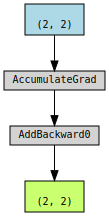

In [ ]:
torchviz.make_dot(y)

Now let's try to do more operations on ``y`` and see how the graph would change.

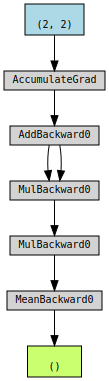

In [ ]:
z = y * y * 3
out = z.mean()
torchviz.make_dot(out)

As you can see, PyTorch can automatically track our operations on ``torch.tensor``.

Now, let's take a look at how to compute the gradients.

$$o = \frac{1}{4}\sum_{i=1}^4 3(x_i + 2)^2$$

In [ ]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


``.backward()`` will automatically delete the stored computation graph. Calling `.backward()` on the same tensor for the second time will cause an error.

In [ ]:
out.backward()

RuntimeError: ignored

You can set `retain_graph=True` when calling `.backward()` so that the graph won't be deleted.

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward(retain_graph=True)
# call the second time
out.backward()
print(x.grad)

tensor([[9., 9.],
        [9., 9.]])


 Notice that now the elements value in `x.grad` has been changed to `9`. This is because PyTorch will cumulatively sum up all backward gradients.

You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` either by wrapping the code block in
``with torch.no_grad():``

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


Or by using ``.detach()`` to get a new Tensor with the same
content but that does not require gradients:


In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Debugging in Colab

Most of the time when a Python script fails, it will raise an Exception.
When the interpreter hits one of these exceptions, information about the cause of the error can be found in the *traceback*, which can be accessed from within Python.
With the ``%xmode`` magic function, IPython allows you to control the amount of information printed when the exception is raised.
Consider the following code:

In [ ]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [ ]:
func2(1)

ZeroDivisionError: ignored

In [ ]:
# most compact
%xmode Plain
func2(1)

Exception reporting mode: Plain


ZeroDivisionError: ignored

In [ ]:
# default
%xmode Context
func2(1)

Exception reporting mode: Context


ZeroDivisionError: ignored

In [ ]:
# gives additional information about function argument
%xmode Verbose
func2(1)

Exception reporting mode: Verbose


ZeroDivisionError: ignored

## ipdb
The standard Python tool for interactive debugging is ``pdb``, the Python debugger.
This debugger lets the user step through the code line by line in order to see what might be causing a more difficult error.
The IPython-enhanced version of this is ``ipdb``, the IPython debugger.

There are many ways to launch and use both these debuggers; we won't cover them fully here.
Refer to the online documentation of these two utilities to learn more.

In IPython, perhaps the most convenient interface to debugging is the ``%debug`` magic command.
If you call it after hitting an exception, it will automatically open an interactive debugging prompt at the point of the exception.
The ``ipdb`` prompt lets you explore the current state of the stack, explore the available variables, and even run Python commands!

Let's look at the most recent exception, then do some basic tasks–print the values of ``a`` and ``b``, and type ``quit`` to quit the debugging session:

In [ ]:
func2(1)

ZeroDivisionError: ignored

In [ ]:
%debug

> <ipython-input-34-586ccabd0db3>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x

ipdb> print(a)
1
ipdb> print(b)
0
ipdb> exit()



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



**Remember: after you are done with debugging, please remove the extra lines/blocks of code before submsision.**

## Partial list of debugging commands

There are many more available commands for interactive debugging than we've listed here; the following table contains a description of some of the more common and useful ones:

| Command         |  Description                                                |
|-----------------|-------------------------------------------------------------|
| ``list``        | Show the current location in the file                       |
| ``h(elp)``      | Show a list of commands, or find help on a specific command |
| ``q(uit)``      | Quit the debugger and the program                           |
| ``c(ontinue)``  | Quit the debugger, continue in the program                  |
| ``n(ext)``      | Go to the next step of the program                          |
| ``<enter>``     | Repeat the previous command                                 |
| ``p(rint)``     | Print variables                                             |
| ``s(tep)``      | Step into a subroutine                                      |
| ``r(eturn)``    | Return out of a subroutine                                  |

For more information, use the ``help`` command in the debugger, or take a look at ``ipdb``'s [online documentation](https://github.com/gotcha/ipdb).

# Build and Train a Neural Network

`torch.nn` is the package that we are going to use a lot in EECS 504/442. It provides many useful built-in functions for building neural networks.

First, let's take a look at how to define a neural network.

For any neural network built in PyTorch, user will need to specific `__init__()` and `forward()`.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # input img: 28x28
        self.fc2 = nn.Linear(128, 64) # hidden dims: 128, 64
        self.out = nn.Linear(64, 10) # output size: 10 classes

    def forward(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        y = self.out(h)
        return y

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


We count the number of parameters in the neural network.

In [ ]:
def count_parameters(model):
    return sum(layer.numel() for layer in model.parameters() if layer.requires_grad)

In [ ]:
print(f'Total parameters: {count_parameters(net)}')

Total parameters: 109386


Now, let's try a random input and compute the loss. We will define a mean squared error as the loss function.

In [ ]:
input = torch.rand(1, 784)
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)

criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(0.9791, grad_fn=<MseLossBackward0>)


Great! We have successfully calculated the loss value on a pair of random input-target. Now, let's try to do backpropagation to update the neural network so that it can output approximately the groundtruth target.

Remember that `.backward()` would accumulate the gradients. It's a good practice to zero the gradient buffer before we do any backpropagation.

In [ ]:
net.zero_grad()
loss.backward()
print(list(net.parameters())[0].grad)

tensor([[-6.9841e-03, -9.9571e-03, -9.4698e-03,  ..., -8.4898e-05,
         -1.0811e-02, -1.0025e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.5091e-03,  6.4285e-03,  6.1139e-03,  ...,  5.4812e-05,
          6.9794e-03,  6.4726e-03],
        [ 1.5811e-02,  2.2541e-02,  2.1438e-02,  ...,  1.9220e-04,
          2.4473e-02,  2.2696e-02]])


The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):
``weight = weight - learning_rate * gradient``.

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange # progress bar
import numpy as np

In [ ]:
net = Net()
num_iters = 1000
learning_rate = 0.01
loss_traj = []

for _ in tnrange(num_iters):
    # step 1: compute loss
    output = net(input)
    loss = criterion(output, target)

    # step 2: compute gradient
    net.zero_grad()
    loss.backward()

    # step 3: update the model parameters
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

    # keep track the loss values for visualization
    loss_traj.append(loss.item())

  0%|          | 0/1000 [00:00<?, ?it/s]

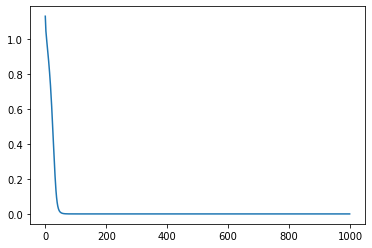

In [ ]:
plt.plot(np.arange(num_iters), loss_traj)

Great! We have successfully trained our first neural network to perform perfectly on a random data.

# Train a Classifier

Train a neural network on a single random data point is not very exciting. Now, let's try to put together what we have learned and train a 2-layer neural network to classify the images in CIFAR-10 dataset.

We can easily download the datafrom from `torchvision.datasets`. `torch.utils.data.DataLoader` is useful for creating a data feeding pipeline.

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


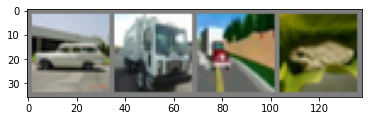

  car truck truck  frog


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Previously, we trained a simple multilayer perceptron. Here, we will define and train a convolutional neural network.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the neural netowrk and send it to the GPU
net = Net().cuda()
summary(net, input_size = (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Now, we have successfully defined a neural network with 2 convolutional layers, 2 max pooling layers and 3 linear layers. Let's define the loss, the optimizer, and train the neural network.

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 5e-4)

num_epochs = 10

for epoch in tnrange(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch} loss: {running_loss}')
    running_loss = 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 loss: 369.78421556949615
Epoch 1 loss: 311.09054470062256
Epoch 2 loss: 293.6010811328888
Epoch 3 loss: 280.05870163440704
Epoch 4 loss: 268.6155854463577
Epoch 5 loss: 258.8651080131531
Epoch 6 loss: 251.68679070472717
Epoch 7 loss: 244.74466383457184
Epoch 8 loss: 238.78835117816925
Epoch 9 loss: 234.08250308036804


Save the trained model parameters.

In [ ]:
# save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# load the saved model
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
correct = 0
total = 0
pred_list = []
labels_list = []
# no need to keep track of the computation graph when testing
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        labels_list.append(labels.detach().numpy())
        pred_list.append(predicted.detach().numpy())

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Now, let's plot the confusion matrix to understand how the model performs on each of the class.

In [ ]:
labels = np.concatenate(labels_list)
preds = np.concatenate(pred_list)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(preds, labels)

In [ ]:
sns.heatmap(conf_matrix, cmap="YlGnBu", yticklabels=classes, xticklabels=classes)

The network tends to misclassify cat as dog, truck as car, deer as bird.

# Exercise (Optional)

Now you have a good understanding of the basics of PyTorch. Now it's your turn to practice your new skills.


## Basic Operations

Use [`torch.bmm`](https://pytorch.org/docs/1.1.0/torch.html#torch.bmm) to perform a batched matrix multiply.


In [ ]:
B, N, M, P = 3, 2, 5, 4
x = torch.rand(B, N, M)  # Random tensor of shape (B, N, M)
y = torch.rand(B, M, P)  # Random tensor of shape (B, M, P)

# We can use a for loop to (inefficiently) compute a batch of matrix multiply
# operations
z1 = torch.empty(B, N, P)  # Empty tensor of shape (B, N, P)
for i in range(B):
  z1[i] = x[i].mm(y[i])
print('Here is the result of batched matrix multiply with a loop:')
print(z1)

z2 = None
##############################################################################
# TODO: Use bmm to compute a batched matrix multiply between x and y; store  #
# the result in z2.                                                          #
##############################################################################
# Replace "pass" statement with your code
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
print('\nHere is the result of batched matrix multiply with bmm:')
print(z2)

# The two may not return exactly the same result; different linear algebra
# routines often return slightly different results due to the fact that
# floating-point math is non-exact and non-associative.
diff = (z1 - z2).abs().max().item()
print('\nDifference:', diff)
print('Difference within threshold:', diff < 1e-6)

## Tensor Indexing

Practice with boolean masks by implementing the following function:

In [ ]:
def num_negative(x):
  """
  Return the number of negative values in the tensor x

  Inputs:
  - x: A tensor of any shape

  Returns:
  - num_neg: Number of negative values in x
  """
  num_neg = 0
  ##############################################################################
  # TODO: Use boolean masks to count the number of negative elements in x.     #
  ##############################################################################
  # Replace "pass" statement with your code
  pass
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return num_neg

# Make a few test cases
torch.manual_seed(598)
x0 = torch.tensor([[-1, -1, 0], [0, 1, 2], [3, 4, 5]])
x1 = torch.tensor([0, 1, 2, 3])
x2 = torch.randn(100, 100)
assert num_negative(x0) == 2
assert num_negative(x1) == 0
assert num_negative(x2) == 4984
print('num_negative seems to be correct!')

##  Broadcasting

Write a function that normalizes the columns of a matrix. It should compute the mean and standard deviation of each column, then subtract the mean and divide by the standard deviation for each element in the column.

Example:
```
x = [[ 0,  30,  600],
     [ 1,  10,  200],
     [-1,  20,  400]]
```
- The first column has mean 0 and std 1
- The second column has mean 20 and std 10
- The third column has mean 400 and std 200

After normalizing the columns, the result should be:
```
y = [[ 0,  1,  1],
     [ 1, -1, -1],
     [-1,  0,  0]]
```

In [ ]:
def normalize_columns(x):
  """
  Normalize the columns of a matrix by subtracting the mean and dividing by the
  standard deviation.

  Inputs:
  - x: Tensor of shape (N, M)

  Returns:
  - y: Tensor of shape (N, M) which is a copy of x with normalized columns.
  """
  y = x.clone()
  ##############################################################################
  # TODO: Complete the implementation of this function. Do not modify x.       #
  # Your implementation should not use any loops; instead you should use       #
  # reduction and broadcasting operations.                                     #
  ##############################################################################
  # Replace "pass" statement with your code
  pass
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return y

In [ ]:
x0 = torch.tensor([[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]])
y0 = normalize_columns(x0)
print('Here is x0:')
print(x0)
print('Here is y0:')
print(y0)
assert y0.tolist() == [[0., 1., 1.], [1., -1., -1.], [-1., 0., 0.]]
assert x0.tolist() == [[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]]